### Business Problem : Predicting Store Sales

### Statistics Problem : As we have to forecast sales, using Regression techniques would be apt.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store = pd.read_csv('stores.csv')
feature = pd.read_csv('features.csv')
sales = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


## Data Cleaning

#### Handling missing values in 'feature' dataset, before joining the data

In [7]:
# Treating Missing values
def missing_values(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
         x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode()[0])
    return x

feature = feature.apply(missing_values)

In [8]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
# Joining the Dataframes
combine = pd.merge(left=feature, right=store,how='left', on='Store')

# combine train data
data = pd.merge(left=sales, right=combine, how='left', on=['Date','Store','IsHoliday'])

In [10]:
# Joining the Dataframes
combine = pd.merge(left=feature, right=store,how='left', on='Store')

# combine train data
test = pd.merge(left=test, right=combine, how='left', on=['Date','Store','IsHoliday'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     115064 non-null  float64
 7   MarkDown2     115064 non-null  float64
 8   MarkDown3     115064 non-null  float64
 9   MarkDown4     115064 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           115064 non-null  float64
 12  Unemployment  115064 non-null  float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [13]:
#profile_report = pandas_profiling.ProfileReport(data)
#profile_report.to_file('Sales_profiling.html')

#### Below are the findings after pandas profiling

* There are no missing values in the data.
* There are no duplicate values.
* Variables are not highly correlated
* High cardinality in Date column, which is fine. We will convert date into Years, Months, Qaurters and Weeks to lower the high cardinality.

### Data preparation will be done for train set and test set simultaneously

##### Fixing Date variable, breaking the same into Years, Months, Quarters and Weeks.

In [14]:
data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')
test['Date'] = pd.to_datetime(test.Date, format='%Y-%m-%d')

In [15]:
#for train dataset

data['SuperBowl'] = np.where((data.Date == '2010-02-12') | (data.Date == '2011-02-11'), 1, 0) 
data['LaborDay'] = np.where((data.Date == '2010-09-10') | (data.Date == '2011-09-11'), 1, 0)
data['Thanksgiving'] = np.where((data.Date == '2010-11-26') | (data.Date == '2011-11-25'), 1, 0)
data['Christmas'] = np.where((data.Date == '2010-12-31') | (data.Date == '2011-12-30'), 1, 0)

In [16]:
#for test dataset

test['SuperBowl'] = np.where((test.Date == '2012-02-10') | (test.Date == '2013-02-08'), 1, 0) 
test['LaborDay'] = np.where((test.Date == '2012-09-07') | (test.Date == '2013-09-06'), 1, 0)
test['Thanksgiving'] = np.where((test.Date == '2012-11-23') | (test.Date == '2013-11-29'), 1, 0)
test['Christmas'] = np.where((test.Date == '2012-12-28') | (test.Date == '2013-12-27'), 1, 0)

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Week'] = data['Date'].dt.week

In [18]:
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Quarter'] = test['Date'].dt.quarter
test['Week'] = test['Date'].dt.week

In [19]:
data.drop('Date', axis = 1, inplace = True)
test.drop('Date', axis = 1, inplace = True)

In [20]:
#converting True/ False to 1,0

data['IsHoliday'] = data['IsHoliday']*1
test['IsHoliday'] = test['IsHoliday']*1

#### Splitting Categorical and numerical variables

In [21]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'SuperBowl',
       'LaborDay', 'Thanksgiving', 'Christmas', 'Year', 'Month', 'Quarter',
       'Week'],
      dtype='object')

In [22]:
test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'SuperBowl', 'LaborDay', 'Thanksgiving',
       'Christmas', 'Year', 'Month', 'Quarter', 'Week'],
      dtype='object')

In [23]:
data_num = data[['Weekly_Sales', 'Fuel_Price', 'Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']]
data_cat = data[['Year', 'Month', 'Quarter', 'Week', 'Type', 'Store', 'Dept', 'SuperBowl', 'LaborDay', 'IsHoliday', 'Thanksgiving', 'Christmas']]

In [24]:
test_num = test[['Fuel_Price', 'Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']]
test_cat = test[['Year', 'Month', 'Quarter', 'Week', 'Type', 'Store', 'Dept', 'SuperBowl', 'LaborDay', 'IsHoliday', 'Thanksgiving', 'Christmas']]

In [25]:
print('No. of columns in data: ', len(data.columns))
print('No. of columns in data_num: ', len(data_num.columns))
print('No. of columns in data_cat: ', len(data_cat.columns))

No. of columns in data:  23
No. of columns in data_num:  11
No. of columns in data_cat:  12


In [26]:
print('No. of columns in test: ', len(test.columns))
print('No. of columns in test_num: ', len(test_num.columns))
print('No. of columns in test_cat: ', len(test_cat.columns))

No. of columns in test:  22
No. of columns in test_num:  10
No. of columns in test_cat:  12


#### Outlier treatment

In [27]:
#Outlier treatment
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

#Implementing outlier function 
data_num = data_num.apply(outlier_capping)
test_num = test_num.apply(outlier_capping)

In [28]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekly_Sales  421570 non-null  float64
 1   Fuel_Price    421570 non-null  float64
 2   Temperature   421570 non-null  float64
 3   MarkDown1     421570 non-null  float64
 4   MarkDown2     421570 non-null  float64
 5   MarkDown3     421570 non-null  float64
 6   MarkDown4     421570 non-null  float64
 7   MarkDown5     421570 non-null  float64
 8   CPI           421570 non-null  float64
 9   Unemployment  421570 non-null  float64
 10  Size          421570 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 38.6 MB


### Data Summary

#### Univariate Analysis

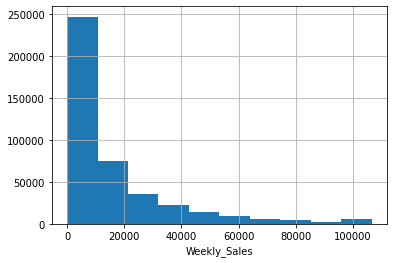

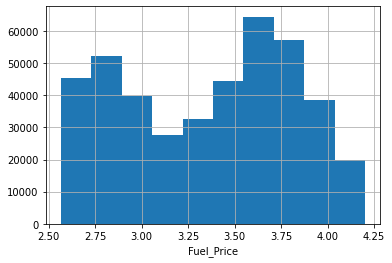

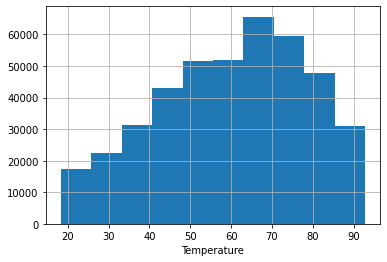

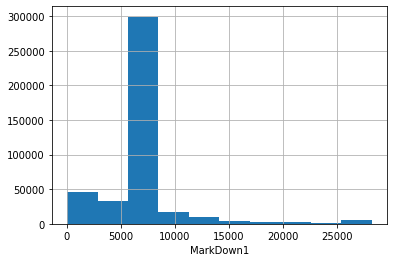

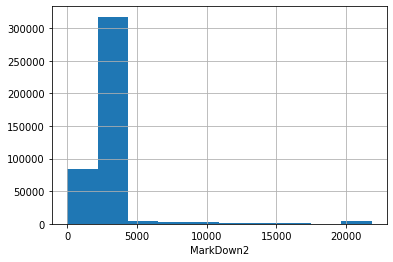

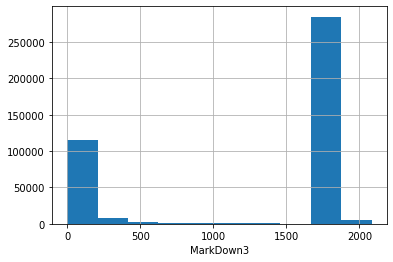

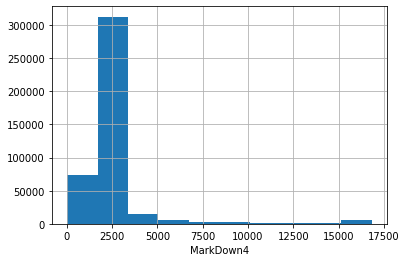

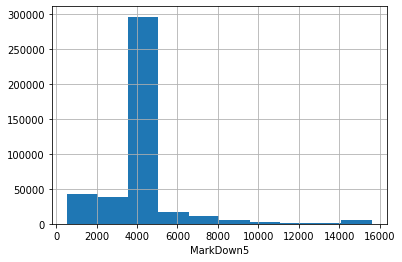

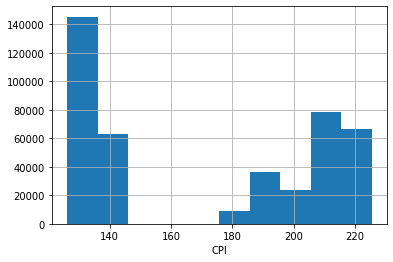

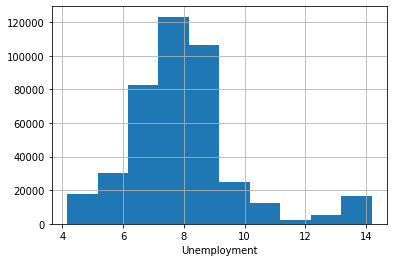

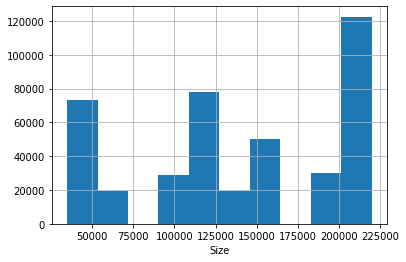

In [29]:
for x in data_num.columns:
    data_num[x].hist()
    plt.xlabel(str(x))
    plt.show()

#### Insights from above plots

* Weekly_Sales is following exponential distribution.

#### Bi-variate Analysis

In [30]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

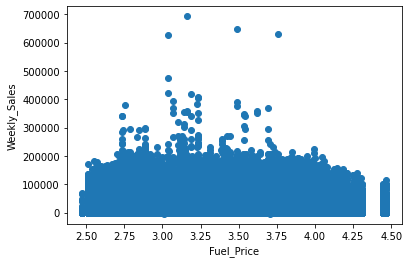

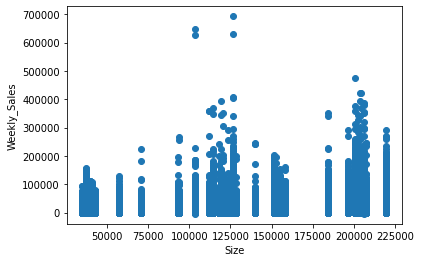

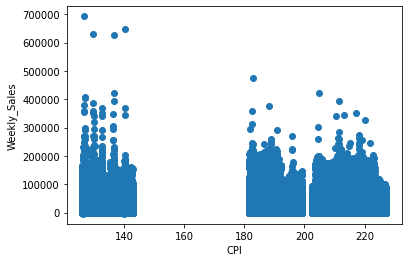

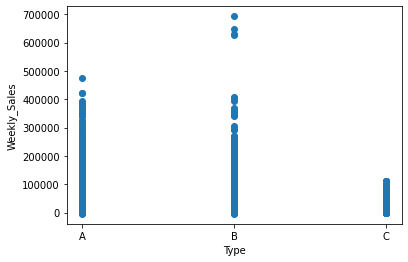

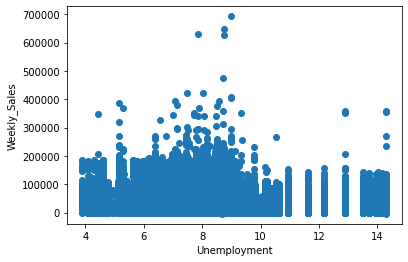

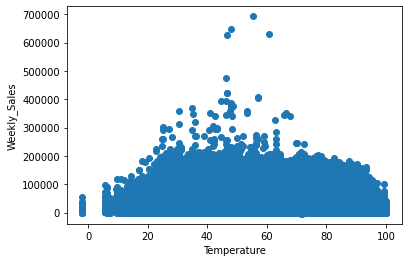

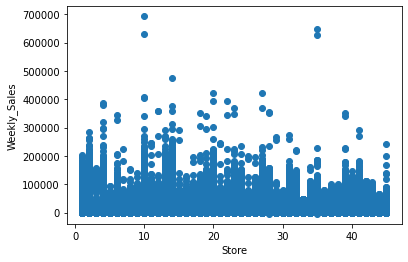

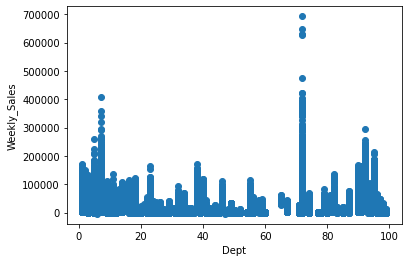

In [31]:
scatter(data_num, 'Fuel_Price')
scatter(data_num, 'Size')
scatter(data_num, 'CPI')
scatter(data_num, 'Type')
scatter(data_num, 'Unemployment')
scatter(data_num, 'Temperature')
scatter(data_num, 'Store')
scatter(data_num, 'Dept')

In [32]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = data_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Weekly_Sales,421570.0,0.0,6.599483e+09,15654.535929,7612.030000,20781.670902,4.318778e+08,5.000000,5.000000,59.974500,291.097000,2079.650000,7612.030000,20205.852500,42845.673000,61201.951000,106477.746460,106479.586000
Fuel_Price,421570.0,0.0,1.416587e+06,3.360265,3.452000,0.456205,2.081234e-01,2.565000,2.565000,2.653000,2.720000,2.933000,3.452000,3.738000,3.917000,4.029000,4.202000,4.202000
Temperature,421570.0,0.0,2.533977e+07,60.108106,62.090000,18.297286,3.347907e+02,18.300000,18.300000,27.310000,33.980000,46.680000,62.090000,74.280000,83.580000,87.270000,92.810000,92.810000
MarkDown1,421570.0,0.0,2.938654e+09,6970.736994,7032.371786,3882.201994,1.507149e+07,58.340000,58.340000,709.320000,2565.800000,7032.371786,7032.371786,7032.371786,8624.560000,12407.710000,28177.290000,28177.290000
MarkDown2,421570.0,0.0,1.330473e+09,3155.995685,3384.176594,2691.713792,7.245323e+06,1.500000,1.500000,22.800000,96.940000,3384.176594,3384.176594,3384.176594,3384.176594,3789.560000,21813.160000,21813.160000
MarkDown3,421570.0,0.0,5.243956e+08,1243.911197,1760.100180,781.513378,6.107632e+05,0.350000,0.350000,2.700000,7.170000,115.390000,1760.100180,1760.100180,1760.100180,1760.100180,2083.280000,2083.280000
MarkDown4,421570.0,0.0,1.337418e+09,3172.468492,3292.935886,2198.393252,4.832933e+06,14.330000,14.330000,273.530000,696.470000,3292.935886,3292.935886,3292.935886,3292.935886,5163.630000,16822.460000,16822.460000
MarkDown5,421570.0,0.0,1.759170e+09,4172.900167,4132.216422,2008.458518,4.033906e+06,548.020000,548.020000,1288.810000,2049.020000,4132.216422,4132.216422,4132.216422,5284.630000,7456.150000,15590.530000,15590.530000
CPI,421570.0,0.0,7.217089e+07,171.195504,182.318780,39.149643,1.532695e+03,126.111903,126.111903,126.496258,128.823806,132.022667,182.318780,212.416993,219.444244,221.941558,225.473509,225.473509
Unemployment,421570.0,0.0,3.355685e+06,7.959971,7.866000,1.859419,3.457438e+00,4.156000,4.156000,5.326000,5.965000,6.891000,7.866000,8.572000,9.816000,12.187000,14.180000,14.180000


#### Creating Dummy variables

In [33]:
#Creating dummies for nominal categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [34]:
#Creating dummies for nominal categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in test_cat.columns:
    test_cat[c_feature] = test_cat[c_feature].astype('category')
    test_cat = create_dummies(test_cat , c_feature )

In [35]:
data_cat.head()

,Year_2011,Year_2012,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,SuperBowl_1,LaborDay_1,IsHoliday_1,Thanksgiving_1,Christmas_1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test_cat.head()

,Year_2013,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_11,Month_12,Quarter_2,...,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,SuperBowl_1,IsHoliday_1,Thanksgiving_1,Christmas_1
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Combining both categorical and Continuous data
data_final = pd.concat([data_num,data_cat],axis=1)

In [38]:
test = pd.concat([test_num,test_cat],axis=1)

In [39]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 209 entries, Weekly_Sales to Christmas_1
dtypes: float64(10), int64(1), uint8(198)
memory usage: 118.2 MB


In [40]:
# Looking at the assumptions - Linearity
corr_mat = data_final.corr()

In [41]:
corr_mat

,Weekly_Sales,Fuel_Price,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,SuperBowl_1,LaborDay_1,IsHoliday_1,Thanksgiving_1,Christmas_1
Weekly_Sales,1.000000,0.001395,0.000733,0.065079,0.007083,-0.004590,0.035515,0.086458,-0.022697,-0.025362,...,0.293878,-0.002303,-0.008277,-0.050341,-0.033190,0.001404,-0.001538,0.007922,0.021788,-0.006908
Fuel_Price,0.001395,1.000000,0.142258,0.030301,-0.120313,-0.455592,-0.044007,-0.029651,-0.162609,-0.034938,...,-0.000678,-0.000324,0.000349,0.002979,0.023029,-0.111802,-0.117242,-0.077839,-0.047113,-0.051571
Temperature,0.000733,0.142258,1.000000,-0.009371,-0.203653,-0.007477,-0.000344,-0.040474,0.184320,0.095296,...,0.003854,0.008516,0.002645,0.000126,0.006660,-0.178624,0.054114,-0.156556,-0.077645,-0.151807
MarkDown1,0.065079,0.030301,-0.009371,1.000000,0.061233,-0.086374,0.717055,0.301032,-0.039537,0.034690,...,-0.004135,-0.009295,-0.003253,-0.002955,0.023311,0.001890,0.001330,-0.019609,-0.097141,-0.043720
MarkDown2,0.007083,-0.120313,-0.203653,0.061233,1.000000,0.062240,0.030830,0.046179,-0.037445,0.036849,...,-0.000523,-0.001816,-0.000263,-0.000107,-0.005591,0.010094,0.007100,0.136670,-0.048358,0.343893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SuperBowl_1,0.001404,-0.111802,-0.178624,0.001890,0.010094,0.078650,0.006525,-0.002412,-0.008981,0.028236,...,0.000005,-0.000542,-0.000129,0.000416,-0.004943,1.000000,-0.009974,0.432840,-0.014258,-0.014243
LaborDay_1,-0.001538,-0.117242,0.054114,0.001330,0.007100,0.055323,0.004590,-0.001697,-0.007205,0.019081,...,0.000039,-0.000218,0.000062,-0.000405,-0.003791,-0.009974,1.000000,0.304463,-0.010029,-0.010018
IsHoliday_1,0.007922,-0.077839,-0.156556,-0.019609,0.136670,0.018530,0.014203,-0.037695,-0.001934,0.010305,...,-0.000209,-0.000219,-0.000284,0.000745,0.007053,0.432840,0.304463,1.000000,0.435254,0.434772
Thanksgiving_1,0.021788,-0.047113,-0.077645,-0.097141,-0.048358,0.094113,-0.066764,-0.068464,-0.001410,0.008105,...,-0.000157,-0.000492,-0.000123,0.000775,0.003477,-0.014258,-0.010029,0.435254,1.000000,-0.014322


In [42]:
corr_mat['abs_Weekly_Sales'] = np.absolute(corr_mat['Weekly_Sales'])

# Variable reduction on the basis of correlation metrics
new_col = corr_mat[corr_mat['abs_Weekly_Sales'] > 0.5].columns

In [43]:
new_col

Index(['Weekly_Sales', 'Fuel_Price', 'Temperature', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       ...
       'Dept_96', 'Dept_97', 'Dept_98', 'Dept_99', 'SuperBowl_1', 'LaborDay_1',
       'IsHoliday_1', 'Thanksgiving_1', 'Christmas_1', 'abs_Weekly_Sales'],
      dtype='object', length=210)

#### All X variables have low to moderate correlation with Y variable

<AxesSubplot:>

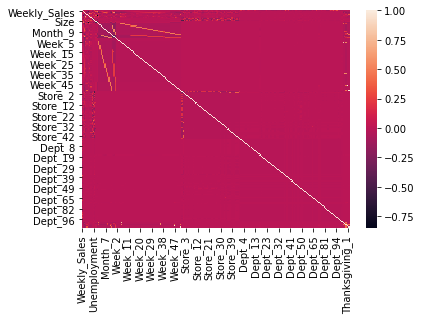

In [44]:
sns.heatmap(data_final.corr())

## Variable reduction


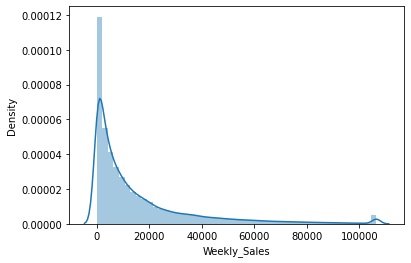

In [45]:
sns.distplot(data_final.Weekly_Sales)
plt.show()

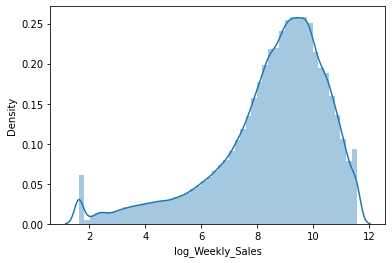

In [46]:
data_final['log_Weekly_Sales'] = np.log(data_final['Weekly_Sales'])

sns.distplot(data_final.log_Weekly_Sales)
plt.show()

In [47]:
data_final.drop('Weekly_Sales', axis = 1, inplace = True)

### 1. F- Regression

In [48]:
features = data_final[data_final.columns.difference( ['log_Weekly_Sales'] )]
target = data_final['log_Weekly_Sales']

In [49]:
#F-Regression # Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [50]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])


In [51]:
f_reg_results.sort_values(by=['F_Value'], ascending=False).head(20)

,Variable,F_Value,P_Value
104,Size,46446.617227,0.000
153,Type_C,24830.396480,0.000
48,Dept_54,24362.380833,0.000
39,Dept_45,15543.199494,0.000
54,Dept_60,13090.764570,0.000
52,Dept_59,13022.533838,0.000
46,Dept_51,11934.029929,0.000
77,Dept_95,9596.184259,0.000
31,Dept_38,9374.782690,0.000
20,Dept_28,9136.880259,0.000


In [52]:
f_reg_results.to_csv('f_reg_results_new.csv')

#### 2. VIF - Check for multicollinearity

* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 indicates high multicollinearity between this independent variable and the others

In [53]:
Final_list = [
'Size',
'Type_C',
'Dept_54',
'Dept_45',
'Dept_60',
'Dept_59',
'Dept_51',
'Dept_95',
'Dept_38',
'Dept_28',
'Dept_92',
'Dept_40',
'Dept_2',
'Store_44',
'Store_38',
'Store_33',
'Dept_90',
'Dept_18',
'Dept_47',
'Store_30'
]

In [54]:
X=features[Final_list]

In [55]:
X

,Size,Type_C,Dept_54,Dept_45,Dept_60,Dept_59,Dept_51,Dept_95,Dept_38,Dept_28,Dept_92,Dept_40,Dept_2,Store_44,Store_38,Store_33,Dept_90,Dept_18,Dept_47,Store_30
0,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,118221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421566,118221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421567,118221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421568,118221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [57]:
vif.sort_values(by='VIF_Factor', ascending=False).head(30)

,VIF_Factor,features
1,2.065304,Type_C
14,1.352092,Store_38
13,1.342856,Store_44
19,1.342245,Store_30
0,1.156365,Size
7,1.016137,Dept_95
11,1.016137,Dept_40
16,1.016137,Dept_90
10,1.016137,Dept_92
8,1.016137,Dept_38


In [58]:
#creating new dataframe as per the final list

data_final1 = pd.concat([X,target],axis=1)

In [59]:
data_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Size              421570 non-null  int64  
 1   Type_C            421570 non-null  uint8  
 2   Dept_54           421570 non-null  uint8  
 3   Dept_45           421570 non-null  uint8  
 4   Dept_60           421570 non-null  uint8  
 5   Dept_59           421570 non-null  uint8  
 6   Dept_51           421570 non-null  uint8  
 7   Dept_95           421570 non-null  uint8  
 8   Dept_38           421570 non-null  uint8  
 9   Dept_28           421570 non-null  uint8  
 10  Dept_92           421570 non-null  uint8  
 11  Dept_40           421570 non-null  uint8  
 12  Dept_2            421570 non-null  uint8  
 13  Store_44          421570 non-null  uint8  
 14  Store_38          421570 non-null  uint8  
 15  Store_33          421570 non-null  uint8  
 16  Dept_90           42

### Model Building

* Using data_final1 Df as Train data set
* Using only columns in test data set after variable reduction activity 

In [60]:
train = data_final1.copy(deep = True)

In [61]:
test = test[Final_list]

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Size      115064 non-null  int64
 1   Type_C    115064 non-null  uint8
 2   Dept_54   115064 non-null  uint8
 3   Dept_45   115064 non-null  uint8
 4   Dept_60   115064 non-null  uint8
 5   Dept_59   115064 non-null  uint8
 6   Dept_51   115064 non-null  uint8
 7   Dept_95   115064 non-null  uint8
 8   Dept_38   115064 non-null  uint8
 9   Dept_28   115064 non-null  uint8
 10  Dept_92   115064 non-null  uint8
 11  Dept_40   115064 non-null  uint8
 12  Dept_2    115064 non-null  uint8
 13  Store_44  115064 non-null  uint8
 14  Store_38  115064 non-null  uint8
 15  Store_33  115064 non-null  uint8
 16  Dept_90   115064 non-null  uint8
 17  Dept_18   115064 non-null  uint8
 18  Dept_47   115064 non-null  uint8
 19  Store_30  115064 non-null  uint8
dtypes: int64(1), uint8(19)
memory usage: 3.8 MB


In [63]:
print('train data', '->', train.shape)
print('test data', '->',test.shape) # Weekly sales missing as the same will predicted
print('Orignal data', '->',data_final1.shape)

train data -> (421570, 21)
test data -> (115064, 20)
Orignal data -> (421570, 21)


#### Linear Regression

In [64]:
formula = "+".join(train.columns.difference(['log_Weekly_Sales']))
formula

'Dept_18+Dept_2+Dept_28+Dept_38+Dept_40+Dept_45+Dept_47+Dept_51+Dept_54+Dept_59+Dept_60+Dept_90+Dept_92+Dept_95+Size+Store_30+Store_33+Store_38+Store_44+Type_C'

In [65]:
import statsmodels.formula.api as smf

model = smf.ols(formula='log_Weekly_Sales~'+formula, data=train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Weekly_Sales   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 1.746e+04
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:34:35   Log-Likelihood:            -7.7267e+05
No. Observations:              421570   AIC:                         1.545e+06
Df Residuals:                  421549   BIC:                         1.546e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5109      0.007   1004.741      0.0

In [66]:
train["pred"] = pd.DataFrame(model.predict(train))
test["pred"] = pd.DataFrame(model.predict(test))

In [67]:
from sklearn import metrics
from scipy.stats import stats

In [68]:
# Train data
MAPE_train = np.mean(np.abs((train.log_Weekly_Sales - train.pred)/ train.log_Weekly_Sales))
print("Mean absolute percentage error (MAPE) for model built on Train data is ", MAPE_train)

RMSE_train = metrics.mean_squared_error(train.log_Weekly_Sales, train.pred)
print("Root Mean Square Error (RMSE) for model built on Train data is ", RMSE_train)

Corr_train = stats.pearsonr(train.log_Weekly_Sales, train.pred)
print("Correlation", Corr_train)

Mean absolute percentage error (MAPE) for model built on Train data is  0.18887368788766964
Root Mean Square Error (RMSE) for model built on Train data is  2.288287784633893
Correlation (0.6730726010040906, 0.0)


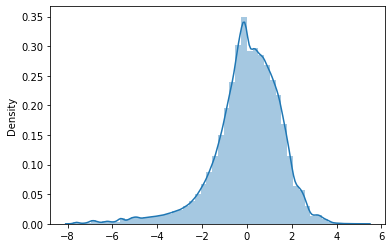

In [69]:
#Diagnostic
sns.distplot(model.resid)
plt.show()

## Converting log of predicted Weekly Sales to normal Weekly Sales

In [70]:
test.rename({'pred' : 'log_pred_Weekly_Sales'}, axis = 'columns', inplace = True)

In [71]:
test['pred_Weekly_Sales'] = np.exp(test['log_pred_Weekly_Sales'])

In [72]:
test.head()

,Size,Type_C,Dept_54,Dept_45,Dept_60,Dept_59,Dept_51,Dept_95,Dept_38,Dept_28,...,Dept_2,Store_44,Store_38,Store_33,Dept_90,Dept_18,Dept_47,Store_30,log_pred_Weekly_Sales,pred_Weekly_Sales
0,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.784129,6529.780674
1,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.784129,6529.780674
2,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.784129,6529.780674
3,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.784129,6529.780674
4,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.784129,6529.780674


#### Performing Decile Analysis

In [73]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)
train.head()

,Size,Type_C,Dept_54,Dept_45,Dept_60,Dept_59,Dept_51,Dept_95,Dept_38,Dept_28,...,Store_44,Store_38,Store_33,Dept_90,Dept_18,Dept_47,Store_30,log_Weekly_Sales,pred,Deciles
0,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.123607,8.784129,5
1,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.737255,8.784129,5
2,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.635748,8.784129,5
3,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9.873211,8.784129,5
4,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9.990944,8.784129,5


In [74]:
test['Deciles']=pd.qcut(test['log_pred_Weekly_Sales'],10, labels=False)
test.head()

,Size,Type_C,Dept_54,Dept_45,Dept_60,Dept_59,Dept_51,Dept_95,Dept_38,Dept_28,...,Store_44,Store_38,Store_33,Dept_90,Dept_18,Dept_47,Store_30,log_pred_Weekly_Sales,pred_Weekly_Sales,Deciles
0,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.784129,6529.780674,5
1,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.784129,6529.780674,5
2,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.784129,6529.780674,5
3,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.784129,6529.780674,5
4,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.784129,6529.780674,5


In [75]:
avg_actual = train[["Deciles", "log_Weekly_Sales"]].groupby('Deciles').mean().sort_index(ascending = False)["log_Weekly_Sales"]
avg_pred = train[["Deciles", "pred"]].groupby(train.Deciles).mean().sort_index(ascending = False)["pred"]

In [76]:
Decile_analysis_train = pd.concat([avg_pred, avg_actual], axis = 1)
Decile_analysis_train

,pred,log_Weekly_Sales
Deciles,,
9,10.918011,10.760785
8,9.268029,9.350108
7,9.224290,9.102992
6,9.167331,9.326657
5,8.810009,8.797084
4,8.595312,8.584151
3,8.495654,8.814158
2,8.174421,8.142977
1,7.363266,7.179260


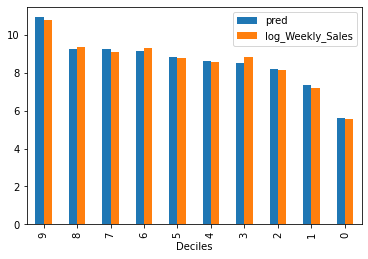

In [77]:
Decile_analysis_train.plot(kind = 'bar')
plt.show()

In [78]:
#### Lets save everything in metrics_df to pickle object
import pickle

# now you can save it to a file
with open('model_Linear_reg.pkl', 'wb') as f:
    pickle.dump(model, f)

In [79]:
# and later you can load it
with open('model_Linear_reg.pkl', 'rb') as f:
    model_new = pickle.load(f)

In [80]:
model_new.predict(test)

0         8.784129
1         8.784129
2         8.784129
3         8.784129
4         8.784129
            ...   
115059    8.505661
115060    8.505661
115061    8.505661
115062    8.505661
115063    8.505661
Length: 115064, dtype: float64

#### Random Forest Regressor

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [82]:
train_rf = data_final1.copy(deep = True)

In [83]:
train_x = train_rf[train_rf.columns.difference(['log_Weekly_Sales'])]
train_y = train_rf["log_Weekly_Sales"]

In [84]:
test_rf = test.copy(deep = True)

In [85]:
test_rf.drop(['log_pred_Weekly_Sales', 'pred_Weekly_Sales', 'Deciles'], axis = 1, inplace = True)

In [86]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [87]:
#Predicting values for both training and testing data sets
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_rf)

In [91]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)

RMSE_train_1 = np.sqrt(metrics.mean_squared_error(train_y,rf_train_pred))
print(RMSE_train_1)

MAPE values for training and testing data :
0.23035126739759523
1.7670745195951834


In [93]:
#Comparing RMSE for both the models

print('RMSE for Linear Regression: ', RMSE_train)
print('RMSE for Random Forest Regressor', RMSE_train_1)

RMSE for Linear Regression:  2.288287784633893
RMSE for Random Forest Regressor 1.7670745195951834


# RMSE for Random Forest Regressor is lower, hence, this model has a better fit.